# Chapter6 탐색적 데이터 분석

## 6-1. 기초통계랑 분석

- 평균

In [1]:
import pandas as pd 

data = {'Score': [80, 90, 100, 70, 85]} 
df = pd.DataFrame(data) 

mean_value = df['Score'].mean()
print('평균(Mean): ', mean_value)

평균(Mean):  85.0


- 중앙값(Median)

In [2]:
median_value = df['Score'].median()
print('중앙값(Median): ', median_value)

중앙값(Median):  85.0


- 최빈값(Mode)

In [3]:
mode_value = df['Score'].mode()
print('최빈값(Mode): ', mode_value)

최빈값(Mode):  0     70
1     80
2     85
3     90
4    100
Name: Score, dtype: int64


- 최대값, 최소값

In [4]:
min_value = df['Score'].min()
max_value = df['Score'].max() 
print('최대값(Max): ', max_value, '   최소값(Min): ', min_value)

최대값(Max):  100    최소값(Min):  70


- 표준편차(Standard Deviation, std)

In [5]:
std_value = df['Score'].std()
print('표준편차(std): ', std_value)

표준편차(std):  11.180339887498949


- 분산(Variance) 

In [6]:
variance_value = df['Score'].var() 
print('분산(Variance): ', variance_value) 

분산(Variance):  125.0


In [7]:
import pandas as pd 
file_path = 'datasets/heart.csv'
df = pd.read_csv(file_path)

print("\n 기초통계량 분석 결과")
print(df.describe()) 

print('\n 평균 \n', df.mean())
print('\n 중앙값 \n', df.median())
print('\n 최빈값 \n', df.mode())
print('\n 최대값 \n', df.max())
print('\n 최소값 \n', df.min())
print('\n 표준편차 \n', df.std())
print('\n 분산 \n', df.var())


 기초통계량 분석 결과
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.52

## 6-2. 상관분석

데이터의 첫 5행:
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

상관계수 행렬: 
                age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol     

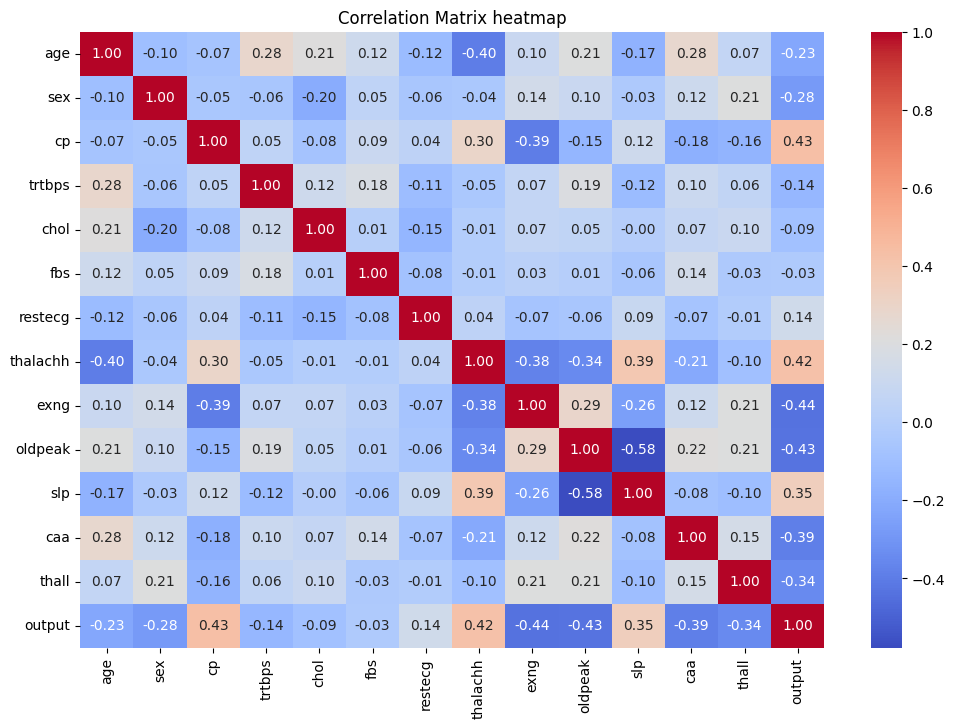

In [9]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

file_path = 'datasets/heart.csv'
df = pd.read_csv(file_path)

print('데이터의 첫 5행:\n', df.head()) 

# 상관계수 계산 
correlation_matrix = df.corr(method='pearson') 
print('\n상관계수 행렬: \n', correlation_matrix) 

#히트맵 시각화 
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix heatmap")
plt.show()


## 6-3.교차분석

In [10]:
import pandas as pd

file_path = 'datasets/heart.csv'
df = pd.read_csv(file_path)
df.head(5) 

crosstab = pd.crosstab(df['sex'], df['output'])
print("교차표(빈도):\n")
crosstab

교차표(빈도):



output,0,1
sex,,
0,24,72
1,114,93


In [11]:
# 행 기준 비율 계산 
row_percentage = pd.crosstab(df['sex'], df['output'], normalize='index') * 100
print("\n행 기준 비율:\n")
row_percentage
                       


행 기준 비율:



output,0,1
sex,,
0,25.000000,75.000000
1,55.072464,44.927536


In [12]:
# 열 기준 비율 계산 
col_percentage = pd.crosstab(df['sex'], df['output'], normalize='columns') * 100
print("\n열 기준 비율:\n")
col_percentage 


열 기준 비율:



output,0,1
sex,,
0,17.391304,43.636364
1,82.608696,56.363636


In [13]:
# 전체 기준 비율 계산 
total_percentage = pd.crosstab(df['sex'], df['output'], normalize=True) * 100
print("\n전체 기준 비율:\n")
total_percentage 


전체 기준 비율:



output,0,1
sex,,
0,7.920792,23.762376
1,37.623762,30.693069


In [17]:
# 전체 기준 비율 계산 및 합계 포함  
total_percentage_with_totals = pd.crosstab(df['sex'], df['output'], normalize=True, margins=True) * 100
total_percentage_with_totals = total_percentage_with_totals.round(2)
print("\n전체 기분 비율 (합계 포함):\n")
total_percentage_with_totals 


전체 기분 비율 (합계 포함):



output,0,1,All
sex,,,
0,7.92,23.76,31.68
1,37.62,30.69,68.32
All,45.54,54.46,100.00


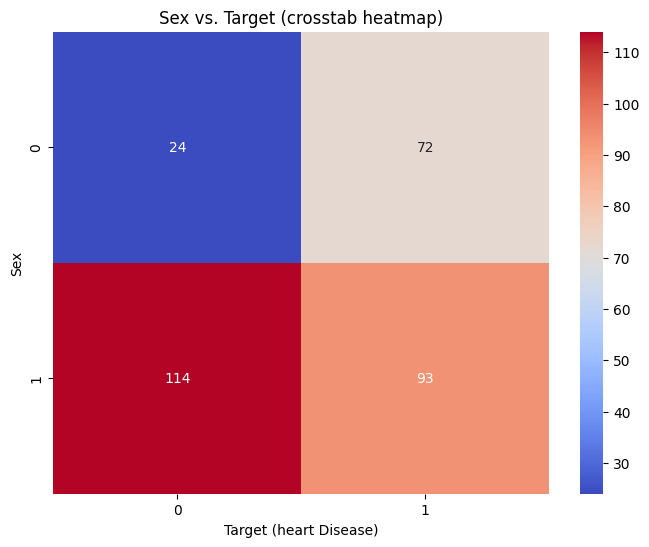

In [18]:
# 교차분석 시각화 
import seaborn as sns
import matplotlib.pyplot as plt


# 교차표를 히트맵으로 시각화 
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="coolwarm", cbar=True) 
plt.title("Sex vs. Target (crosstab heatmap)")
plt.xlabel("Target (heart Disease)") 
plt.ylabel("Sex")
plt.show()


<Axes: xlabel='output', ylabel='sex'>

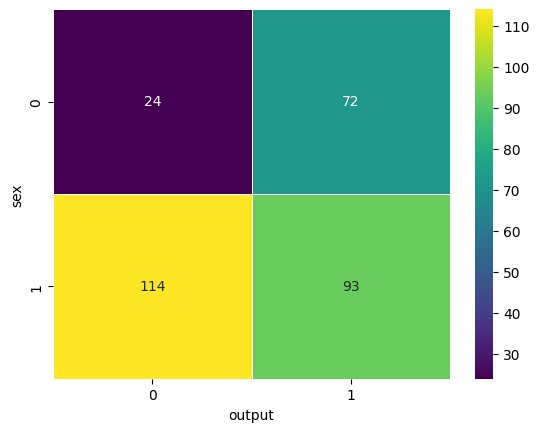

In [19]:
sns.heatmap(crosstab, annot=True, fmt="d", cmap="viridis", linewidths=0.5, cbar=True) 

## 6-4. 시각화

### 6-4-(1) 시각화 라브러이 

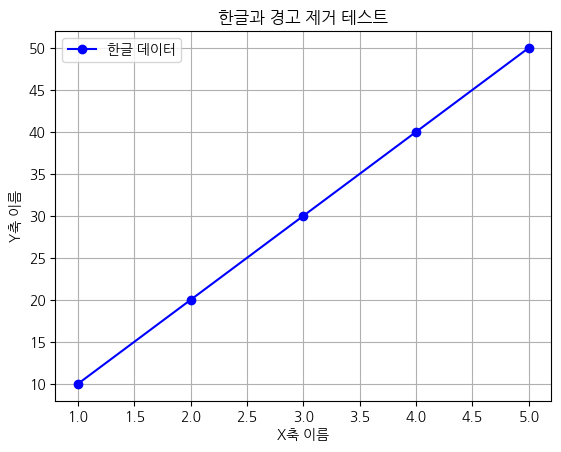

In [22]:
### Matplotlib 그래프 사용 

import matplotlib.pyplot as plt
from matplotlib import rc 
import matplotlib.font_manager as fm
import warnings 

# 경고창 제거 
warnings.filterwarnings('ignore') 

# 한글 글꼴 설정 
#font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
#font_prop = fm.FontProperties(fname=font_path)
rc('font', family='NanumGothic') 
#plt.rcParams['font.family'] = font_prop.get_name()
#plt.rcParams['axes.unicode_minus'] = False 

x = [1, 2, 3, 4,5]
y = [10, 20, 30, 40, 50] 

plt.plot(x, y, label="한글 데이터", color='blue', marker='o')
plt.title("한글과 경고 제거 테스트") 
plt.xlabel("X축 이름")
plt.ylabel("Y축 이름") 
plt.legend()
plt.grid(True) 
plt.show()

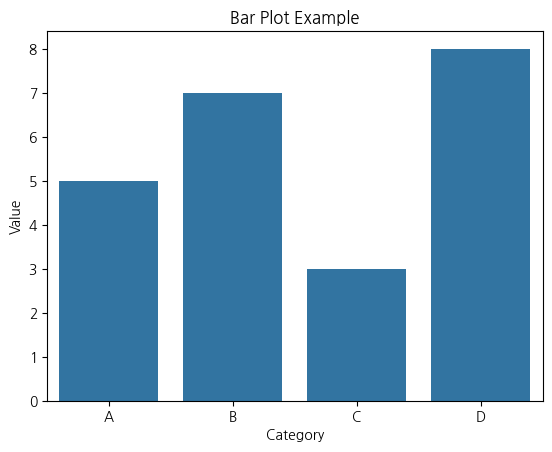

In [23]:
### Seaborn 그래프 사용 

import seaborn as sns 
import pandas as pd

data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'], 
    'Value': [5, 7, 3, 8]
    })

# 막대그래프 
sns.barplot(x='Category', y='Value', data=data)
plt.title("Bar Plot Example") 
plt.show()

In [24]:
### Plotly 그래프 사용 

import plotly.express as px 

data = px.data.gapminder() 
print(data.head(5))

fig = px.scatter (
    data, 
    x='gdpPercap',
    y='lifeExp', 
    size = 'pop',
    color = 'continent', 
    log_x = True, 
    title = "interactive Scatter Plot" 
)

fig.update_layout(width=800, height=500)
fig.show()


ModuleNotFoundError: No module named 'plotly'

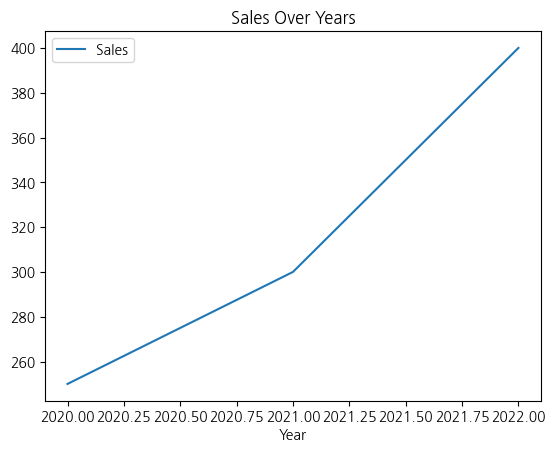

In [25]:
### Pandas Plot 

import pandas as pd

data = {
    'Year': [2020, 2021, 2022],
    'Sales': [250, 300, 400]
}

df = pd.DataFrame(data)

df.plot(x='Year', y='Sales', kind='line', title="Sales Over Years")
plt.show()

### 6-4-(2) 히스토그랩(histogram) 

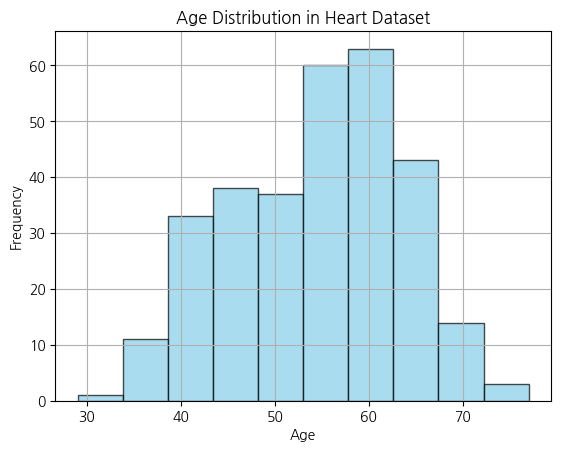

In [26]:
import pandas as pd
import matplotlib.pyplot as plt 

# call data 
data = pd.read_csv("datasets/heart.csv") 

# 히스토그램 생성 
plt.hist(
    data['age'],
    bins=10,
    color='skyblue', 
    alpha=0.7,
    edgecolor='black'
)

plt.title("Age Distribution in Heart Dataset") 
plt.xlabel("Age") 
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### 6-4-(3) 박스 그래프 

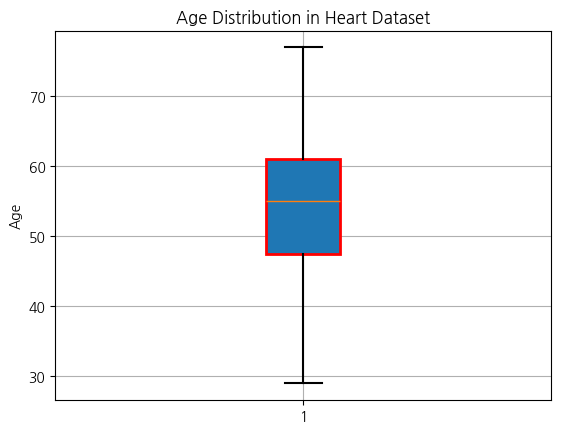

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv("datasets/heart.csv") 

plt.boxplot(
    data['age'],
    vert=True,
    patch_artist=True,
    boxprops = dict(color='red', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5), 
    capprops = dict(color='black', linewidth=1.5)
    
)

plt.title("Age Distribution in Heart Dataset")
plt.ylabel("Age") 
plt.grid(True)
plt.show()

### 6-4-(4) 선 그래프(line plot)

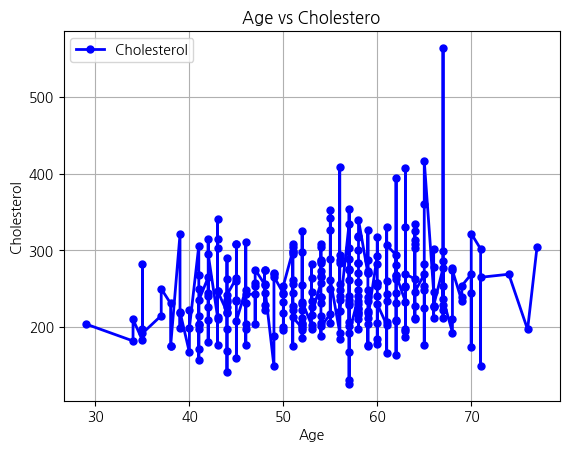

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 

data = pd.read_csv("datasets/heart.csv") 

data = data.sort_values(by="age") 
data.head()

plt.plot(
    data['age'],
    data['chol'],
    color='blue',
    linewidth=2,
    linestyle='-',
    marker='o',
    markersize=5,
    label='Cholesterol'
)

plt.title("Age vs Cholestero") 
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend()
plt.grid(True)
plt.show()


### 6-4-(5) 막대 그래프(bar plot) 

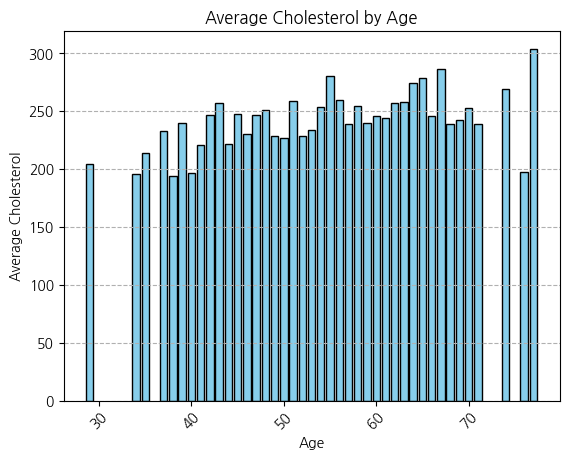

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv("datasets/heart.csv") 

age_group = data.groupby("age")['chol'].mean().reset_index() 

plt.bar(
    age_group['age'], 
    age_group['chol'],
    color='skyblue', 
    width=0.8,
    edgecolor='black'
)

plt.title("Average Cholesterol by Age") 
plt.xlabel("Age")
plt.ylabel("Average Cholesterol")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--') 
plt.show()



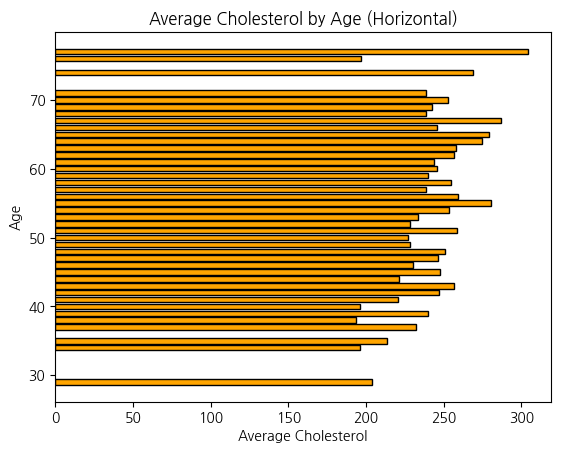

In [30]:
plt.barh(
    age_group['age'], 
    age_group['chol'],
    color='orange', 
    #width=0.8,
    edgecolor='black' 
)

plt.title("Average Cholesterol by Age (Horizontal)") 
plt.ylabel("Age")
plt.xlabel("Average Cholesterol")
#plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--') 
plt.show()


### 6-4(6) 파이 그래프(pie plot) 

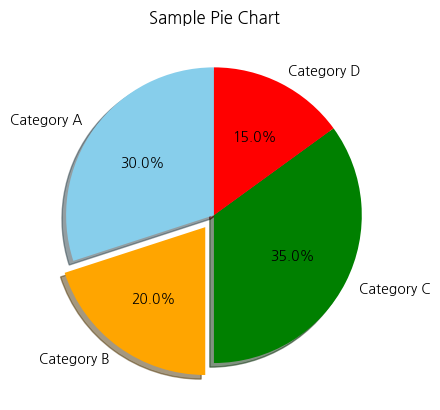

In [31]:
import matplotlib.pyplot as plt 

categories = ['Category A', 'Category B', 'Category C', 'Category D'] 
values = [30, 20, 35, 15] 

plt.pie(
    values, 
    labels = categories, 
    autopct = '%1.1f%%', 
    startangle=90,
    explode = (0, 0.1, 0, 0), 
    colors = ['skyblue', 'orange', 'green', 'red'],
    shadow = True
)

plt.title("Sample Pie Chart")
plt.show()

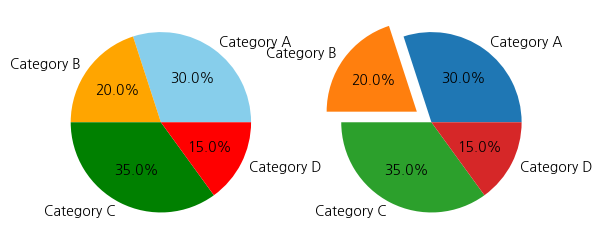

In [32]:
import matplotlib.pyplot as plt 

categories = ['Category A', 'Category B', 'Category C', 'Category D'] 
values = [30, 20, 35, 15]

fig, axs = plt.subplots(1,2) 

axs[0].pie(
    values, 
    labels = categories,
    autopct = '%1.1f%%',
    colors = ['skyblue', 'orange', 'green', 'red']
)

axs[1].pie(
    values, 
    explode=(0, 0.2, 0,0),
    labels = categories, autopct='%1.1f%%'
)

plt.show()

### 6-4-(7) 산점도(Scatter plot)  

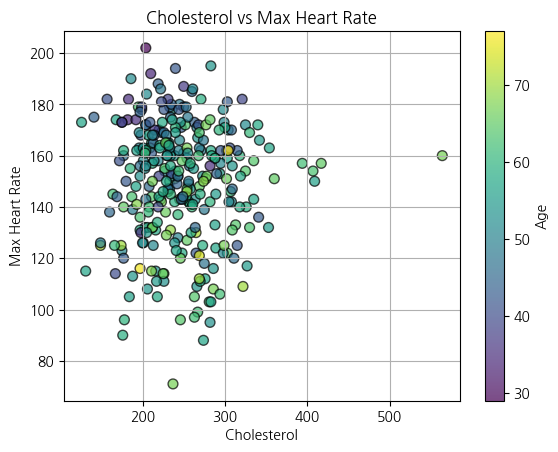

In [33]:
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv('datasets/heart.csv') 
data.head()


plt.scatter(
    data['chol'],
    data['thalachh'],
    c=data['age'],
    s=50,
    alpha=0.7,
    cmap='viridis', 
    edgecolor = 'black'
)

plt.title("Cholesterol vs Max Heart Rate") 
plt.xlabel("Cholesterol")
plt.ylabel("Max Heart Rate")
plt.colorbar(label='Age')
plt.grid(True)
plt.show()


### 6-4(8) 히트맵(heat map) 

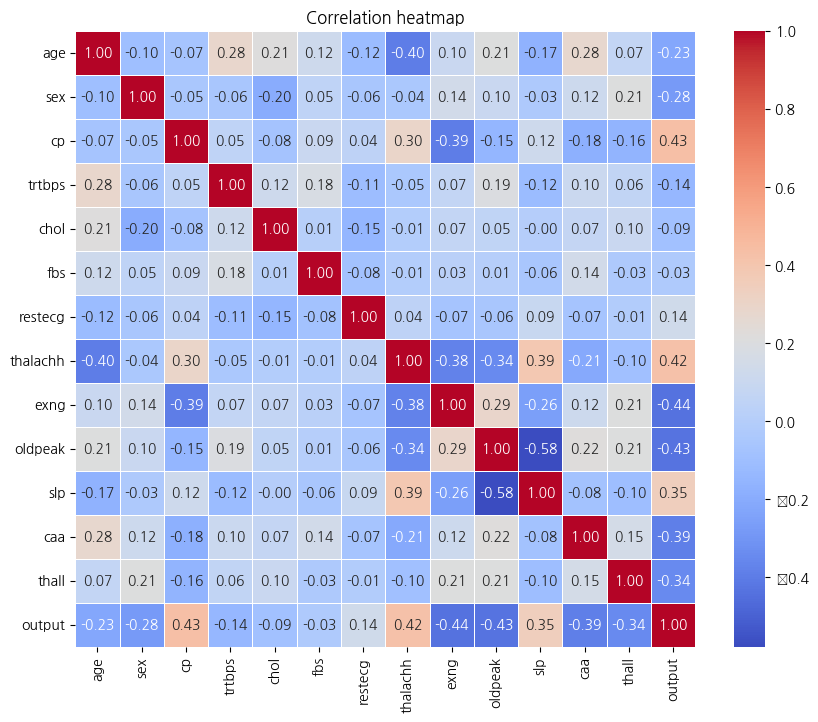

In [34]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

data = pd.read_csv("datasets/heart.csv") 

# 상관관계 계산 
correlation_matrix = data.corr()

# 히드맵 생성 
plt.figure(figsize=(10, 8)) 
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    cbar=True
)

plt.title("Correlation heatmap") 
plt.show()


### 6-4-(9) 기타 그래프 

In [3]:
import pandas as pd 

data = {'Score': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

std_value = df['Score'].std()
print(std_value)

15.811388300841896
